<a href="https://colab.research.google.com/github/TalesMiguel/RNA/blob/main/RNA_trabalho2_SOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Redes Neurais Artificiais - Trabalho 02: Modelo Não-Supervisionado**

### **Feito por:**
Camilo Maia Pires - 140473

Tales Miguel Machado Pereira - 140247

# **1. Introdução**


##**1.1. Self-Organizing Maps (SOM)**
As Redes SOM são modelos neurais não supervisionados que projetam dados de alta dimensão em um espaço bidimensional preservando relações topológicas, gerando uma representação discreta dos dados de entrada. Utilizam aprendizado competitivo onde neurônios "vencedores" ativam vizinhos através de funções de vizinhança, permitindo identificação de clusters e padrões intrínsecos.

A rede SOM busca adaptar interativamente uma matriz de duas dimensões de vetores (ou neurônios/nós) a uma topologia de maior dimensão de um dataset em questão. Em seu aprendizado competitivo, os neurônios competem entre si para determinar quem será ativado (winner) dado uma entrada. Os neurônios estão ligados num mapa topográfico, o que significa que a informação gerada por um input é representada por neurônios vizinhos dada uma região. Por conta disso, um neurônio vencedor também impacta seus vizinhos, podendo inclusive reduzir a atividade dos neurônios em seu entorno através de inibições laterais, que geram feedback negativo.

##**1.2. Objetivo**

Neste trabalho aplicamos uma rede neural não supervisionada, especificamente o modelo Self-Organizing Map (SOM), para análise de padrões em dois datasets: [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer) e [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html). O objetivo foi identificar clusters, avaliar a homogeneidade dos agrupamentos e analisar o impacto de diferentes parâmetros no desempenho do modelo. A rede SOM foi escolhida por sua capacidade de reduzir a dimensionalidade dos dados enquanto preserva a topologia original, permitindo uma visualização intuitiva dos padrões subjacentes. Não entraremos em detalhes teóricos de seu funcionamento, mas uma breve explicação será fornecida para contexto inicial.

<br>

---


#**2. Metodologia**
<br>

##**2.1. Datasets Utilizados**


*   [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer): Contém 569 amostras com 30 atributos de características celulares, classificadas em maligno/benigno.
*   [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html): Contém 178 amostras de vinhos com 13 atributos físico-químicos, divididos em 3 classes.



<br>

###**2.2. Pré-processamento**
* Normalização: Os dados foram normalizados para o intervalo [0, 1] usando MinMaxScaler.


<br>


###**2.3. Treinamento da Rede SOM**

###**2.3.1. Variação de Parâmetros**
Para avaliar o impacto do uso de diferentes parâmetros, foram testadas configurações com:

* Tamanho do mapa aumentado (de 5x2 para 30x20 neurônios);

* Número de épocas aumentado (500, 1000, 5000, 10000);

* Diferentes ETAs (0.1, 0.05, 0.01).

De forma geral, temos:

* 5x2 neurônios com 500 e 1000 épocas de treino e eta 0.1;

* 30x20 neurônios com 5000 e 10000 épocas de treino, além de 0,05 e 0,01 de eta, respectivamente.

<br>

###**2.3.2. Avaliação:**
* **Coeficiente de Silhueta:** O quão “semelhante” o elemento em questão é similar aos outros do seu cluster. Vai de -1 (mau agrupamento, o ponto está mais próximo de outro cluster) a 1 (agrupamento perfeito, o ponto está no centro do cluster). Quanto maior, melhor.


* **Índice de Davies-Bouldin:** O quão “bem separados” foram os clusters. Retorna a similaridade padrão entre os grupos, cujo resultado pode variar de 0 (extremamente similares) até o infinito positivo (não similares). Quanto menor, melhor.

* **Tempo de treinamento:** Comparação de tempo entre diferentes parâmetros.

* **Erros:**
    * **Quantização:** Mede a distância média entre as amostras e os neurônios vencedores. Um erro de quantização baixo indica que os neurônios estão bem ajustados aos dados, ou seja, estão próximos das amostras. Quanto menor, melhor, mas é preciso ter cuidado com overfitting.

    * **Topográfico:** Mede a preservação da topologia. Ele verifica se os neurônios vencedores (BMUs - Best Matching Units) de amostras vizinhas no espaço de entrada também são vizinhos no mapa SOM. Um erro topológico baixo indica que a topologia dos dados foi bem preservada, enquanto um erro alto sugere que a estrutura dos dados foi distorcida. Quanto menor, melhor.

* **U-Matrix:** Para visualização de clusters (áreas mais escuras indicam maiores distâncias entre neurônios, sugerindo fronteiras entre clusters.).

* **Hits Map:** Para análise de densidade de amostras. Identificação de neurônios com muitos hits (clusters densos) e poucos hits (possíveis outliers).


<br>


---



# **3. Implementação**



## **3.1. Instalação e Importação de Bibliotecas**

In [119]:
!pip install minisom

In [120]:
from minisom import MiniSom
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import davies_bouldin_score, silhouette_score
import time



---



##**3.2. Pré-processamento dos dados**
<br>

**Dataset 01:** [Breast Cancer Wisconsin (Diagnostic)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)

**Dataset 02:** [Wine Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)

<br>


#### **3.2.1. Pré-processamento**


In [130]:
dataset_1 = sklearn.datasets.load_breast_cancer()
dataset_2 = sklearn.datasets.load_wine()

# Converte datasets para dataframes
df_1 = pd.DataFrame(dataset_1.data, columns=dataset_1.feature_names)
df_2 = pd.DataFrame(dataset_2.data, columns=dataset_2.feature_names)

# Adicionando rótulos
df_1['label'] = [dataset_1.target_names[i] for i in dataset_1.target]
df_2['label'] = [dataset_2.target_names[i] for i in dataset_2.target]


#### **3.2.2. Normalização dos dados**


Antes de aplicar a rede SOM, os dados foram normalizados para garantir que todos os atributos estivessem na mesma escala. Isso é essencial para algoritmos baseados em distâncias, como o SOM, pois atributos com escalas maiores podem dominar o cálculo das distâncias, prejudicando o desempenho do modelo. Utilizamos a normalização Min-Max, que transforma os dados para o intervalo [0, 1], preservando a distribuição original.

In [132]:
x_cancer = df_1.drop(['label'], axis=1)
x_wine = df_2.drop(['label'], axis=1)

# Normalização dos dados
scaler_cancer = MinMaxScaler()
x_cancer = scaler_cancer.fit_transform(x_cancer)

scaler_wine = MinMaxScaler()
x_wine = scaler_wine.fit_transform(x_wine)


# troca rótulos únicos por números
## Breast Cancer
labels_1 = df_1.label.unique()
df_1['label'] = df_1['label'].replace(labels_1, range(len(labels_1)))
target_cancer = df_1['label'].values

## Wine
labels_2 = df_2.label.unique()
df_2['label'] = df_2['label'].replace(labels_2, range(len(labels_2)))
target_wine = df_2['label'].values


---

## **3.3. Treinamento da rede SOM**

<br>

Uma função genérica que faz o treinamento de todos os modelos de SOM a serem utilizados neste notebook. Isso envolve tanto os modelos do Breast Cancer Dataset e suas variações de hiperparâmetros quanto os do Wine Dataset e suas variações.

### **3.3.1. Função de treino utilizando MiniSom**

In [133]:
# seed fixa para reprodutibilidade
seed = 42

def train_som(ds_name, turn, x_data, nl, nc, sigma, eta, epocas, neighbourhood_function, topology, seed):
    """
    ds_name: nome do dataset
    turn: número do turno/iteração/configuração
    nl: número de neurônios linha
    nc: número de neurônios coluna
    sigma: raio de vizinhança
    eta: taxa de aprendizado
    epocas: número de épocas
    nl: número de neurônios linha
    nc: número de neurônios coluna
    sigma: raio de vizinhança
    eta: taxa de aprendizado
    epocas: número de épocas
    """
    som = MiniSom(nl, nc, x_data.shape[1], sigma=sigma, learning_rate=eta,
             neighborhood_function="gaussian",
             random_seed=seed, topology="hexagonal")

    # Medição do tempo de treinamento
    start_time = time.time()
    som.random_weights_init(x_data)
    som.train_random(x_data, epocas)
    training_time = time.time() - start_time

    # Obter os labels dos clusters
    cluster_labels = [som.winner(x) for x in x_data]
    cluster_labels_indices = [np.ravel_multi_index(label, (nl, nc)) for label in cluster_labels]

    # Métricas
    silhouette_avg = silhouette_score(x_data, cluster_labels_indices)
    db_index = davies_bouldin_score(x_data, cluster_labels_indices)
    q_error = som.quantization_error(x_data)
    t_error = som.topographic_error(x_data)

    return {
        "ds_name": ds_name,
        "turn": turn,
        "som": som,
        "silhouette": silhouette_avg,
        "db_index": db_index,
        "q_error": q_error,
        "t_error": t_error,
        "training_time": training_time
    }

<br>

### **3.3.2. Executando treinamento**

Treinamento para ambos Datasets e os 4 ***turns***.

In [135]:
# Hiperparâmetros definidos previamente
params_set = [
    {"ds_name": "breast_cancer", "turn": 1, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 500},
    {"ds_name": "breast_cancer", "turn": 2, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 1000},
    {"ds_name": "breast_cancer", "turn": 3, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.05, "epocas": 5000},
    {"ds_name": "breast_cancer", "turn": 4, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.01, "epocas": 10000},

    {"ds_name": "wine", "turn": 1, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 500},
    {"ds_name": "wine", "turn": 2, "nl": 5, "nc": 2, "sigma": 5, "eta": 0.1, "epocas": 1000},
    {"ds_name": "wine", "turn": 3, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.05, "epocas": 5000},
    {"ds_name": "wine", "turn": 4, "nl": 30, "nc": 20, "sigma": 5, "eta": 0.01, "epocas": 10000},
]

# Executar treinamentos
results = []
for params in params_set:
    # Seleciona DS correto
    x_data = x_cancer if params["ds_name"] == "breast_cancer" else x_wine

    # Chaves duplicadas
    params_filtered = params.copy()
    ds_name = params_filtered.pop("ds_name")
    turn = params_filtered.pop("turn")

    # Treino da rede SOM
    res = train_som(ds_name, turn, x_data, **params_filtered,
                    neighbourhood_function='gaussian', topology='hexagonal', seed=seed)
    results.append(res)

# Recebe resultados pros plots
resultados = []
results_cancer = []
results_wine = []

for res in results:
    if res["ds_name"] == "breast_cancer":
        results_cancer.append(res)
    elif res["ds_name"] == "wine":
        results_wine.append(res)

    dados = {
        "Dataset": res["ds_name"],
        "Iteração": res["turn"],
        "Coeficiente de Silhueta": f"{res['silhouette']:.4f}",
        "Índice Davies-Bouldin": f"{res['db_index']:.4f}",
        "Erro de Quantização": f"{res['q_error']:.4f}",
        "Erro Topográfico": f"{res['t_error']:.4f}",
        "Tempo de Treinamento (s)": f"{res['training_time']:.2f}",
    }
    resultados.append(dados)

## **3.4. Funções de plotagem dos gráficos**

<br>

Plotagem da visualização das avaliações descritas na introdução para cada ***turn*** (configuração de hiperparâmetros) dos dois Datasets.

### 3.4.1. Coeficiente de Silhueta, Índice de Davies-Bouldin, erro de quantização e erro topográfico

In [136]:
def plot_metrics(results, dataset_name):
    """
    results: lista de dicionários retornados pela função train_som
    dataset_name: nome do dataset (ex: "Breast Cancer", "Wine")

    retorna barplot das metricas:
        coeficiente de silhueta,
        indice de Davies-Bouldin
        erro de quantização
        erro topográfico
    """

    num_results = len(results)

    # Métricas
    sil_value = [res['silhouette'] for res in results]
    db_value = [res['db_index'] for res in results]
    q_errors = [res['q_error'] for res in results]
    t_errors = [res['t_error'] for res in results]

    # Definir a posição dos gráficos (subplots)
    x = np.arange(num_results)
    width = 0.2  # Largura das barras

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2x2 grid para 4 métricas

    # coef de Silhueta
    axes[0, 0].bar(x, sil_value, width, color='skyblue')
    axes[0, 0].set_title(f'Coeficiente de Silhueta - {dataset_name}')
    axes[0, 0].set_xlabel('Iteração')
    axes[0, 0].set_ylabel('Silhouette')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels([f"Turn {res['turn']}" for res in results])

    # Davies-Bouldin
    axes[0, 1].bar(x, db_value, width, color='salmon')
    axes[0, 1].set_title(f'Índice de Davies-Bouldin - {dataset_name}')
    axes[0, 1].set_xlabel('Iteração')
    axes[0, 1].set_ylabel('DB Index')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels([f"Turn {res['turn']}" for res in results])

    # Erro de Quantização
    axes[1, 0].bar(x, q_errors, width, color='lightgreen')
    axes[1, 0].set_title(f'Erro de Quantização - {dataset_name}')
    axes[1, 0].set_xlabel('Iteração')
    axes[1, 0].set_ylabel('Quantization Error')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels([f"Turn {res['turn']}" for res in results])

    # Erro Topográfico
    axes[1, 1].bar(x, t_errors, width, color='lightcoral')
    axes[1, 1].set_title(f'Erro Topográfico - {dataset_name}')
    axes[1, 1].set_xlabel('Iteração')
    axes[1, 1].set_ylabel('Topographic Error')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels([f"Turn {res['turn']}" for res in results])

    plt.tight_layout()
    plt.show()

### 3.4.2. U-Matrix e Hits Map

In [138]:
def plot_som_results(results, x_data, target, dataset_name):
    """
    Plota a U-Matrix e Hits Map para cada variação de hiperparâmetros treinada.
        variação == turn

    results: lista de dicionários retornados pela função train_som
    x_data: dataset original usado para treinamento
    target: rótulos do dataset original
    dataset_name: nome do dataset (ex: "Breast Cancer", "Wine")
    """

    # Definir número de linhas e colunas para os subplots
    num_results = len(results)
    fig, axes = plt.subplots(num_results, 2, figsize=(15, 6 * num_results))  # axes é o subplot

    if num_results == 1:
        axes = [axes]  # axes é uma lista mesmo para 1 resultado

    for i, res in enumerate(results):
        som = res["som"]
        nl, nc = som.get_weights().shape[:2]

        # U-Matrix
        u_matrix = som.distance_map()
        im1 = axes[i][0].imshow(u_matrix, cmap='Blues', origin='lower')
        axes[i][0].set_title(f"U-Matrix - {dataset_name} (Turn {res['turn']})")
        axes[i][0].set_xlabel("Neurônios (Eixo X)")
        axes[i][0].set_ylabel("Neurônios (Eixo Y)")
        fig.colorbar(im1, ax=axes[i][0], label='Distância Média entre Neurônios')

        # Números representando as classes nos neurônios vencedores
        for idx, xx in enumerate(x_data):
            w = som.winner(xx)
            color = 'green' if target[idx] == 0 else 'red'  # Definição de cores
            axes[i][0].text(w[1], w[0], target[idx] + 1, color=color, fontsize=8, ha='center', va='center')

        axes[i][0].text(0.5, -0.15, "Verde: Classe 1 | Vermelho: Classe 2", transform=axes[i][0].transAxes, fontsize=10, ha='center')

# ================//================//================//================//================//================//

        # Hits Map
        hits = som.activation_response(x_data).astype(int)
        im2 = axes[i][1].imshow(hits, cmap='Reds', origin='lower')
        axes[i][1].set_title(f"Hits Map - {dataset_name} (Turn {res['turn']})")
        axes[i][1].set_xlabel("Neurônios (Eixo X)")
        axes[i][1].set_ylabel("Neurônios (Eixo Y)")
        fig.colorbar(im2, ax=axes[i][1], label='Número de Hits')

        # Número de ativações (dentro dos neurônios)
        for (r, c), value in np.ndenumerate(hits):
            axes[i][1].text(c, r, value, ha='center', va='center', color='black', fontsize=8)

    plt.tight_layout() # título com erro de paginação,
    plt.show()


##**4. Resultados**


### 4.1. Dataframe de métricas

In [139]:
# cria df
df_resultados = pd.DataFrame(resultados)
# exibe df detalhado das métricas
display(df_resultados)


,Dataset,Iteração,Coeficiente de Silhueta,Índice Davies-Bouldin,Erro de Quantização,Erro Topográfico,Tempo de Treinamento (s)
0,breast_cancer,1,-0.0249,3.4431,0.5419,0.0000,0.03
1,breast_cancer,2,0.0053,3.2290,0.5325,0.0000,0.08
2,breast_cancer,3,-0.1175,1.1946,0.3377,0.0334,0.91
3,breast_cancer,4,-0.1327,1.2987,0.3568,0.0721,1.79
4,wine,1,0.0977,2.7650,0.5636,0.0000,0.04
5,wine,2,0.1281,2.4576,0.5522,0.0000,0.03
6,wine,3,-0.0168,0.6608,0.3065,0.0056,0.64
7,wine,4,-0.0211,0.7597,0.3423,0.0618,1.35


### 4.2. Barplot das métricas

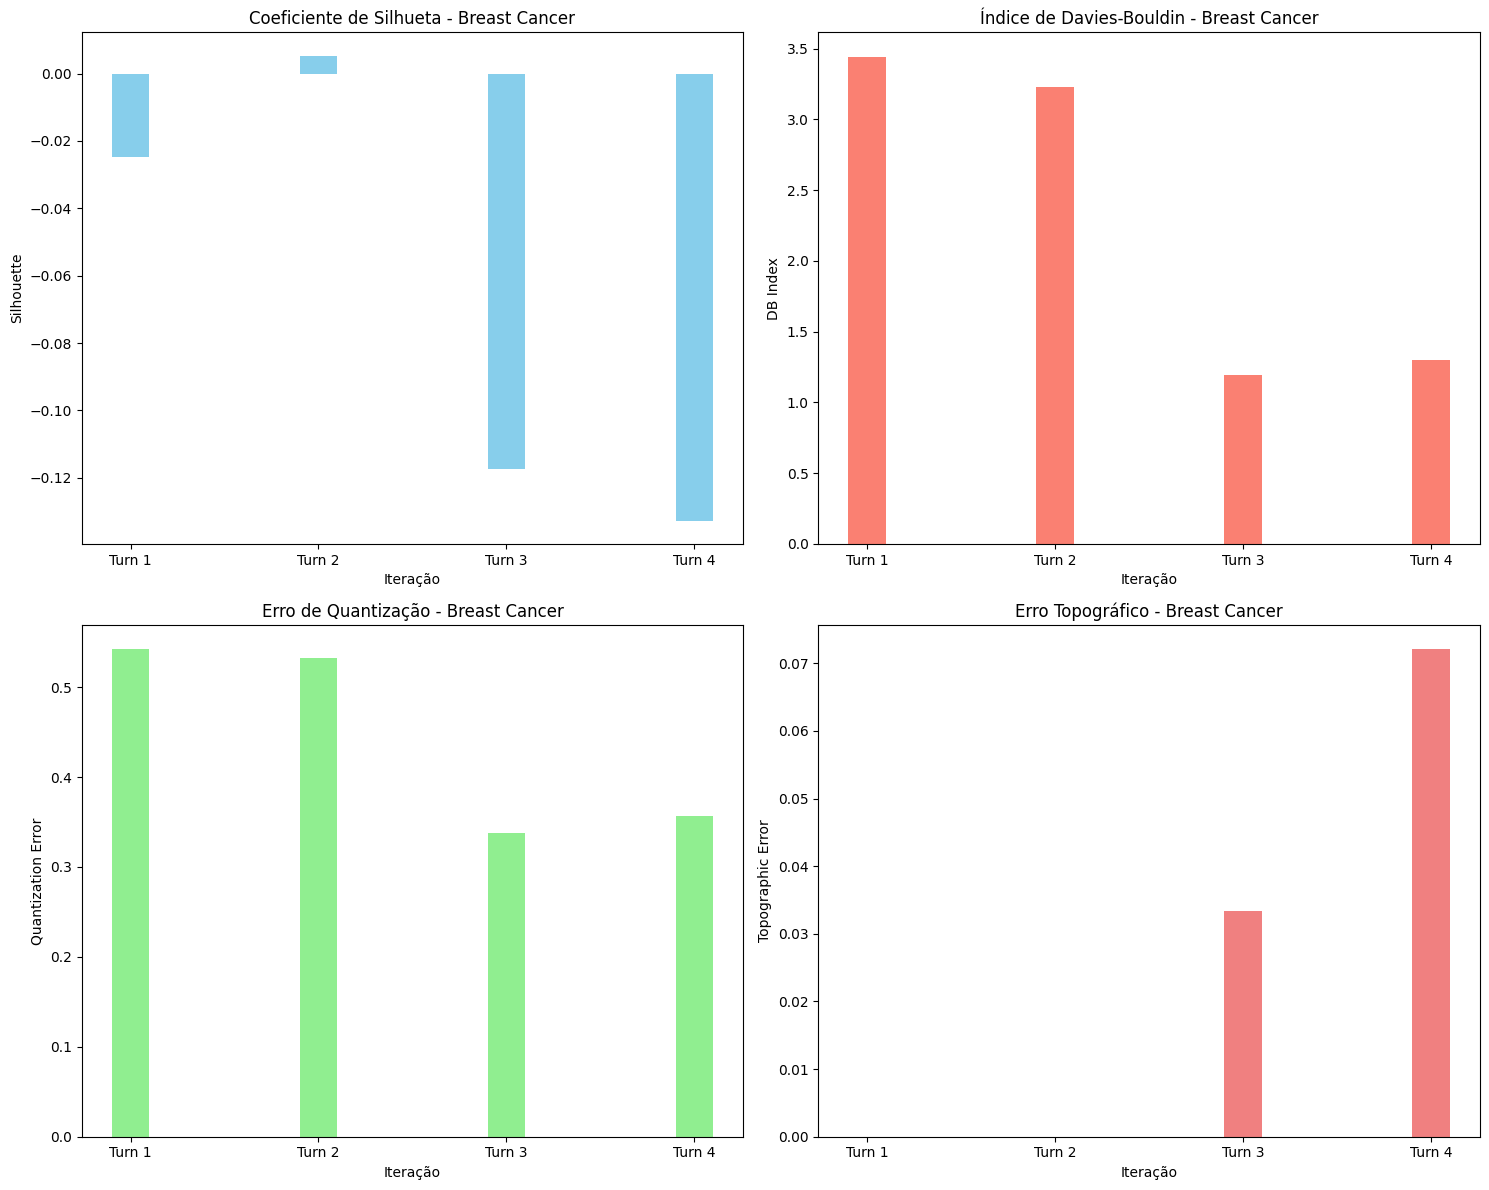

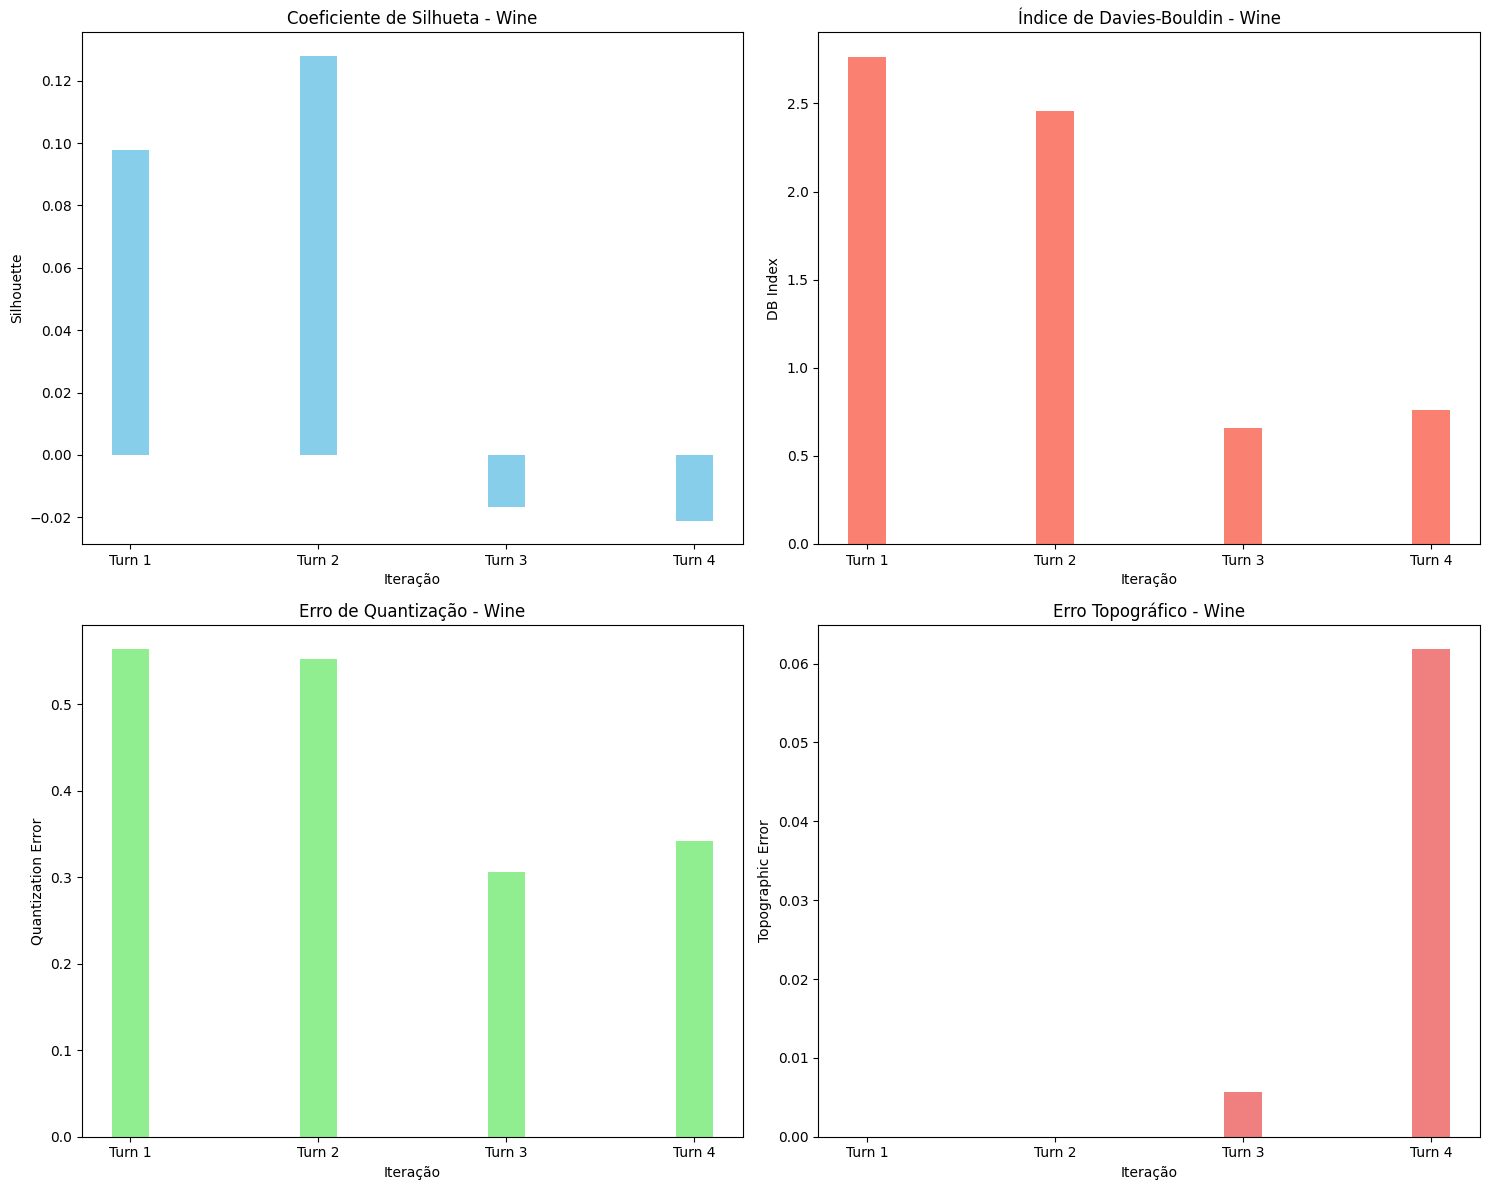

In [140]:
# barplot das métricas
plot_metrics(results_cancer, "Breast Cancer")
plot_metrics(results_wine, "Wine")

### 4.3. U-matrix e Hits Map

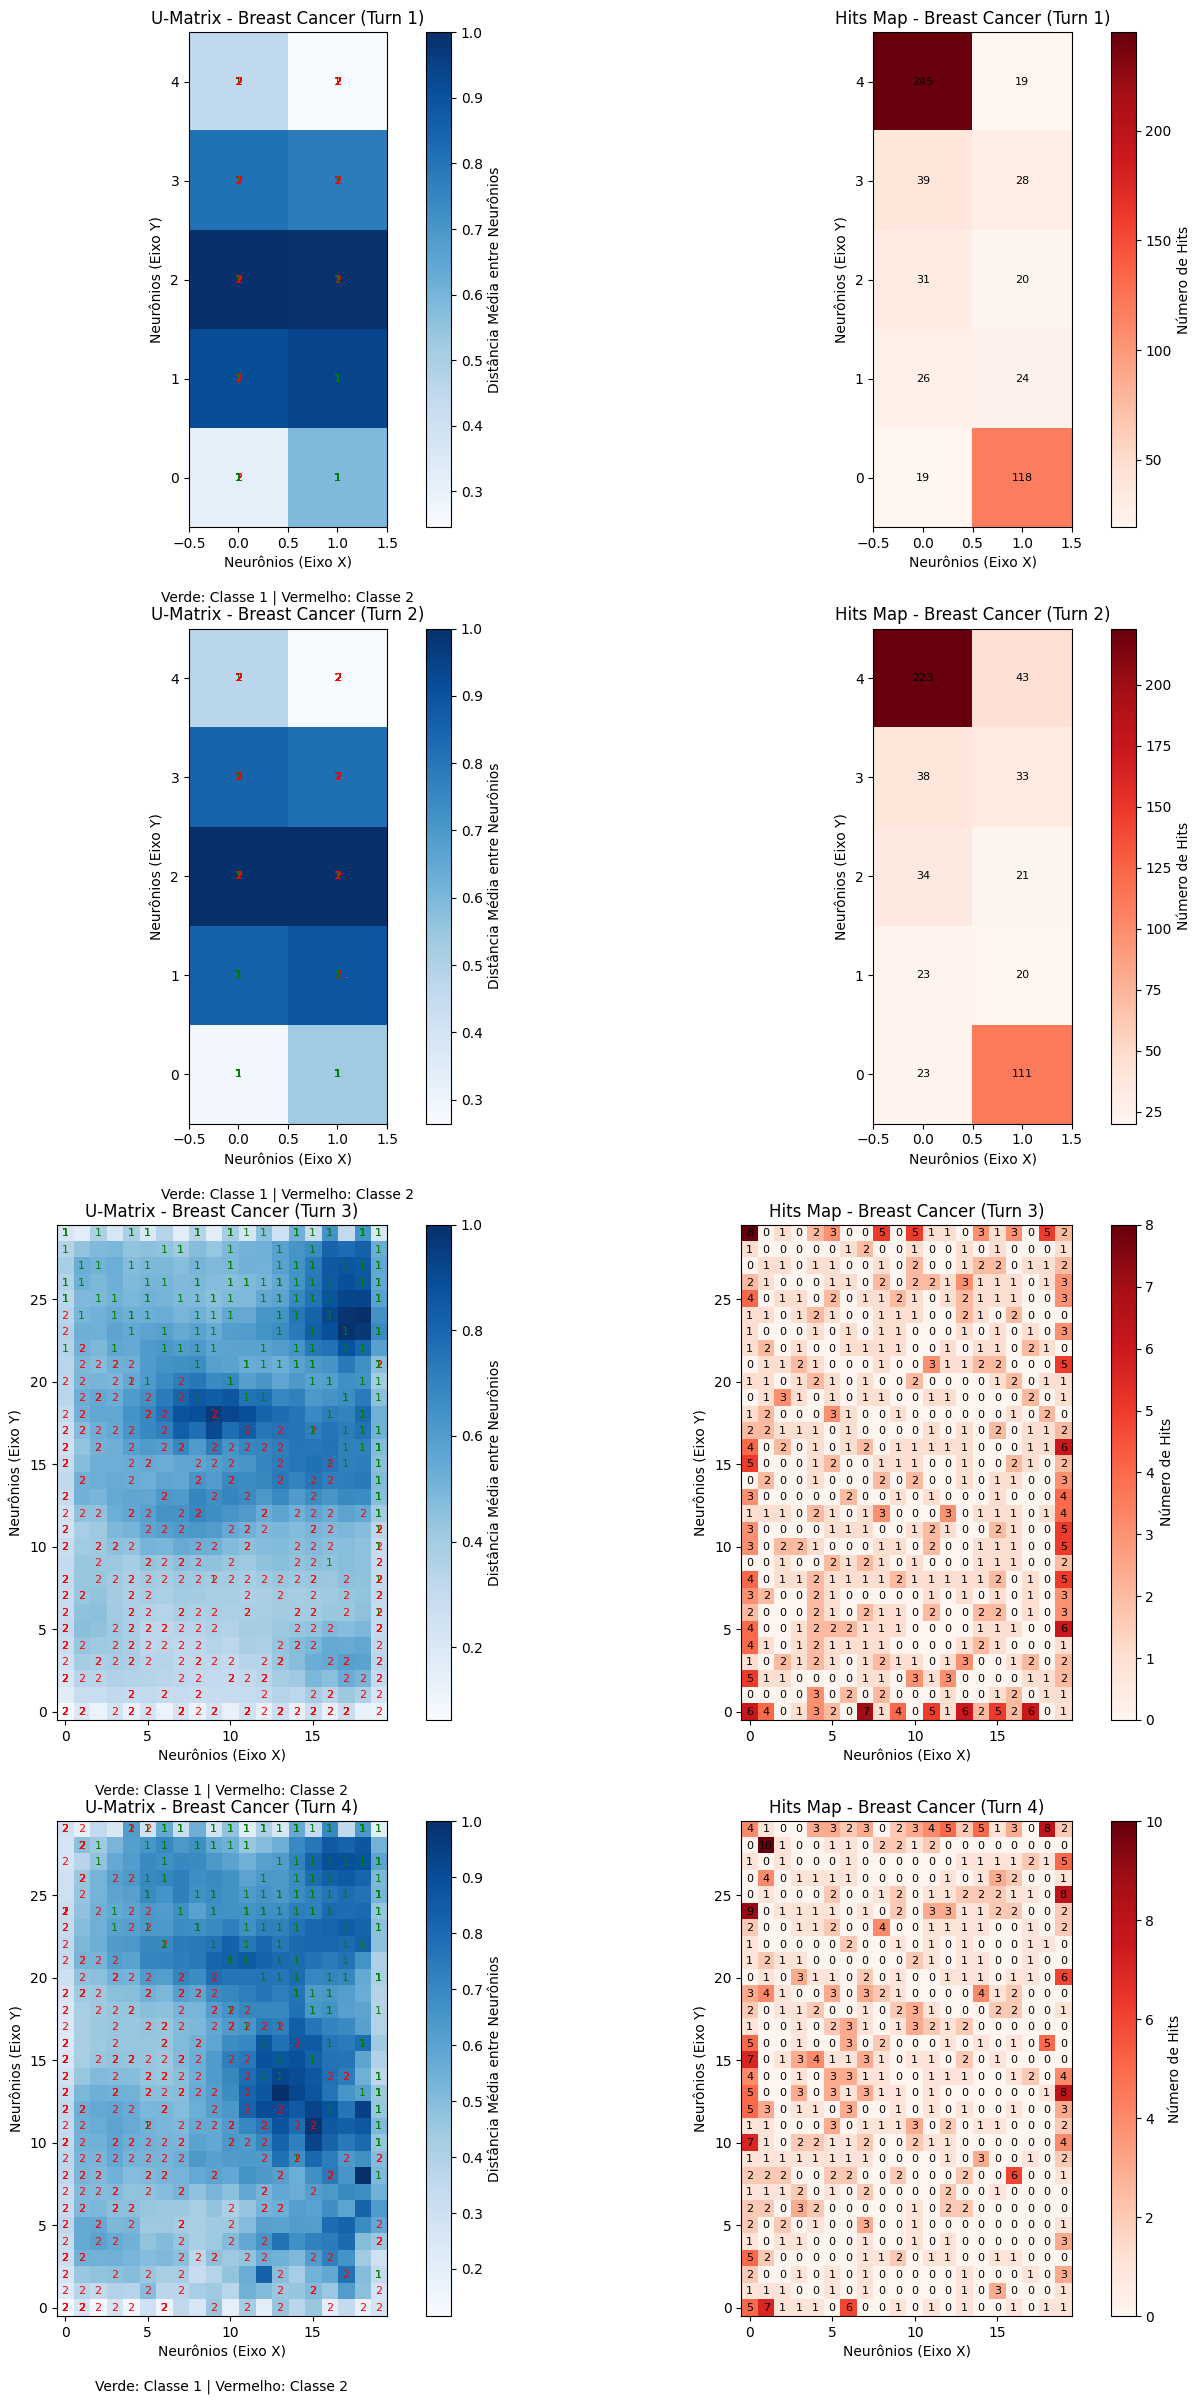

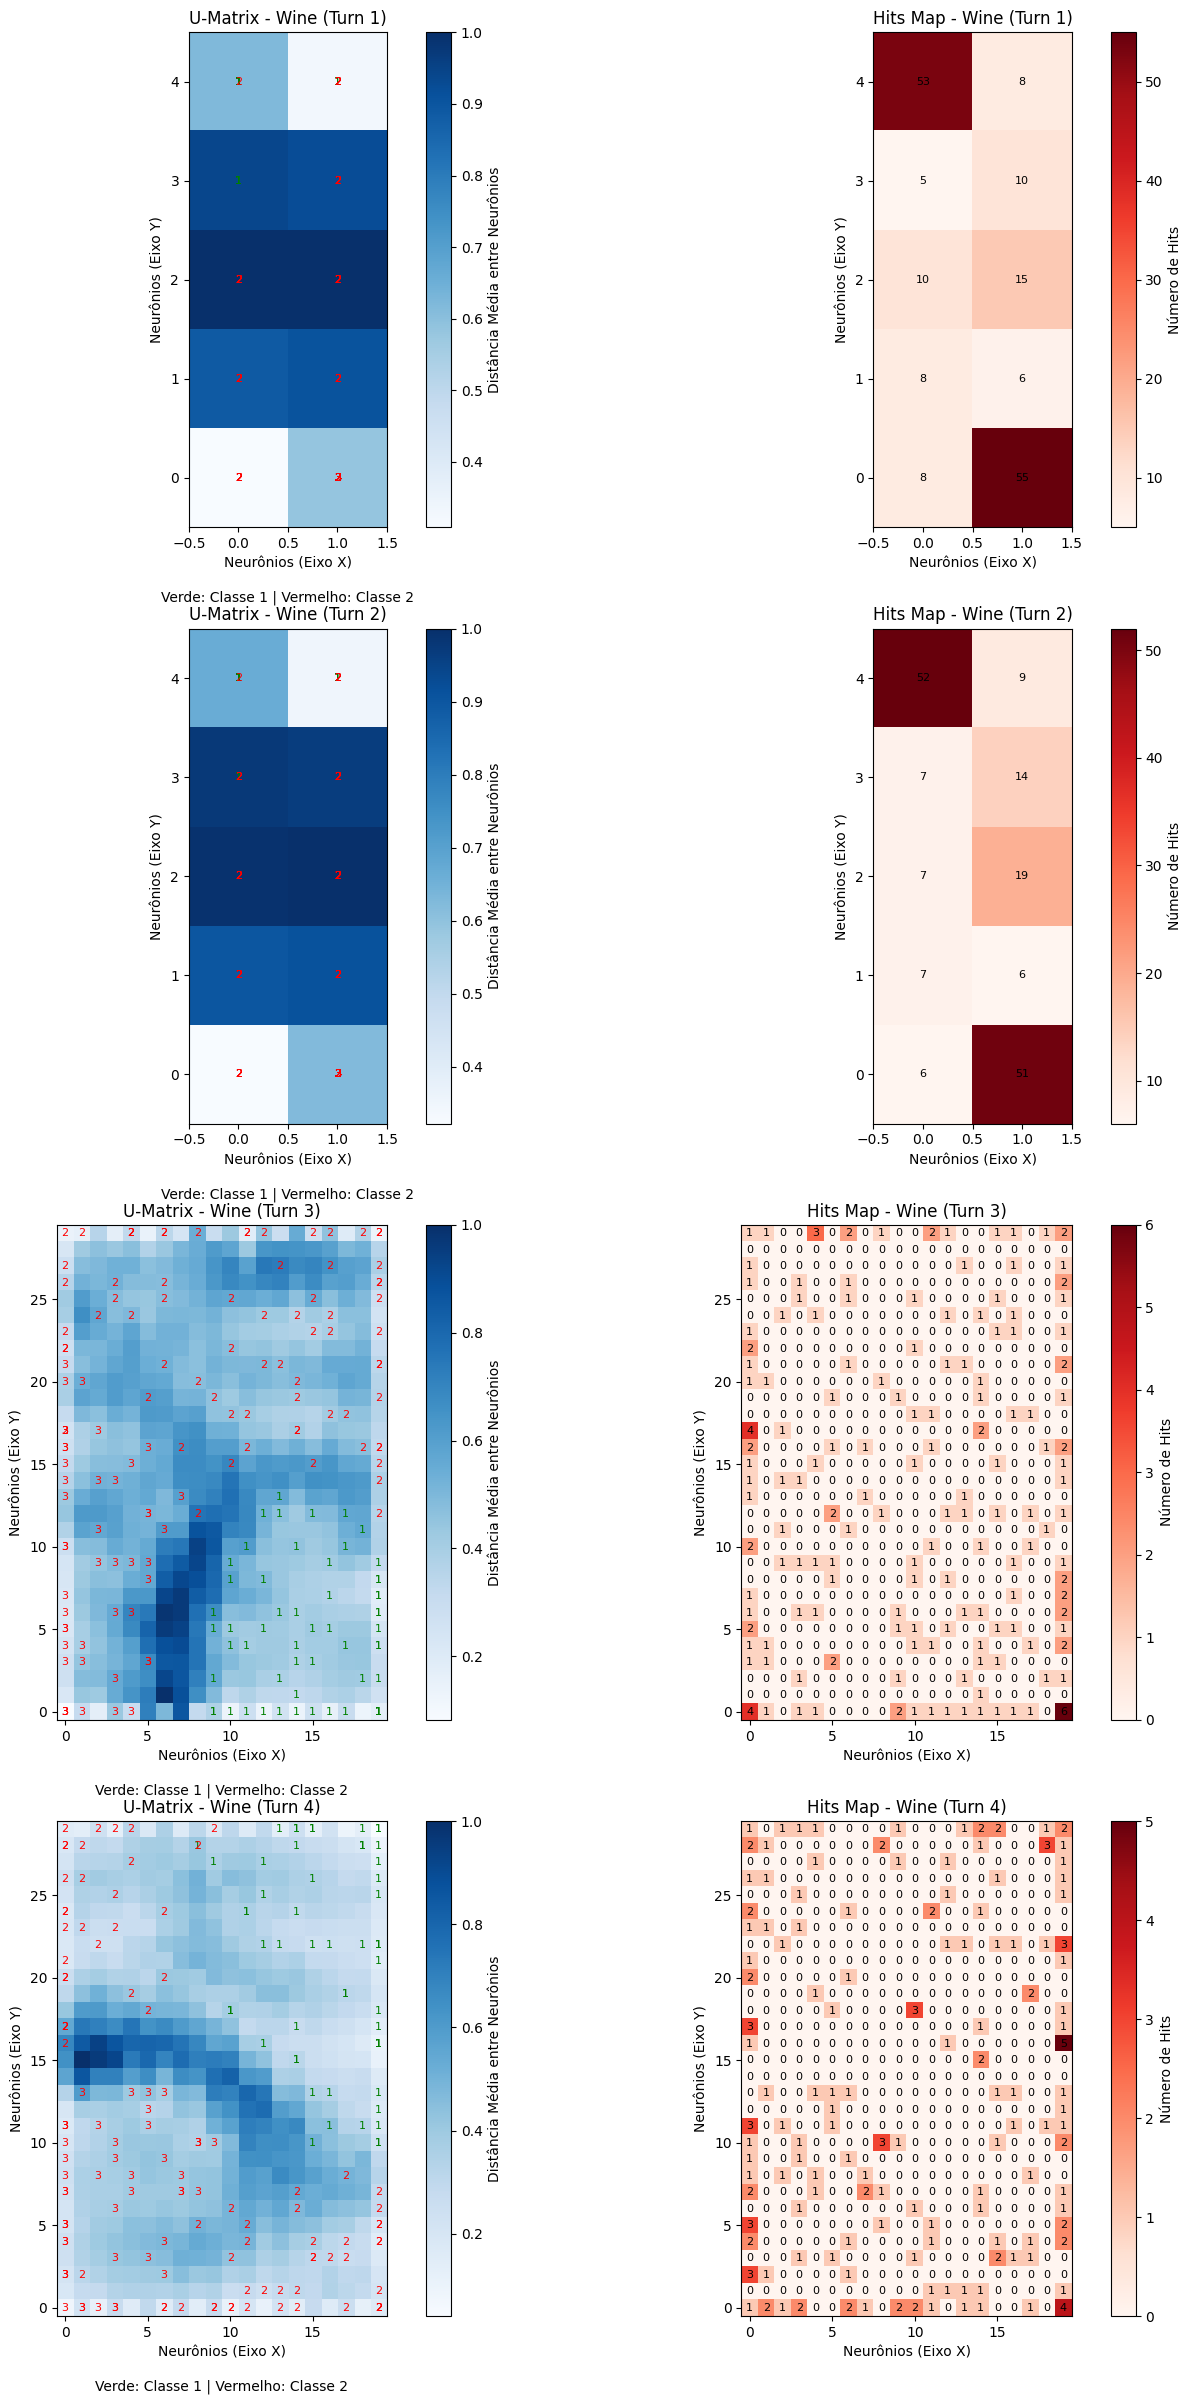

In [141]:
# plota U-matrix e Hits Map
plot_som_results(results_cancer, x_cancer, target_cancer, "Breast Cancer")
plot_som_results(results_wine, x_wine, target_wine, "Wine")

---


##**5. Discussão**

### **5.1. Breast Cancer Wisconsin**

#### Análise da U-Matrix

**Áreas escuras:** Indicam que os neurônios naquela região estão mais distantes uns dos outros. Eles possivelmente representam uma fronteira entre clusters, como em (2,0).

**Áreas claras:** Indicam que os neurônios naquela região estão mais próximos uns dos outros. Essas áreas representam clusters, como em (0,8).

No geral, temos dois clusters principais separando classes malignas (regiões claras) das benignas (regiões escuras).

<br>

#### Análise do Hits Map
**Áreas escuras:** Nos pontos mais escuros temos **clusters densos** representados por neurônios com muitos hits, como em (0,0).

**Áreas claras:** Nos pontos mais claros temos regiões de transição entre clusters, como em (3,2), ou possíveis outliers, como em (2,1).

<br>


#### Variação de parâmetros, erro e tempo

Inicialmente o erro de quantização foi de 0.435, relativamente alto, o que indica que o modelo pode não estar ajustado corretamente ao nosso dataset. Isso pode ser corrigido aumentando o número de neurônios, de épocas ou alterando sigma/eta. O erro topográfico foi de 0.066, sugerindo uma boa preservação da topologia dos dados. O tempo de treinamento foi de cerca de 0.04 segundos, o que é bem baixo.

Ao variar os parâmetros do modelo, observamos que o aumento do número de neurônios e do número de épocas resultou em uma redução do erro de quantização, que caiu para 0.203. O erro topográfico caiu também para 0.014. Com mais neurônios o mapa poderia ter se tornado mais esparso, mas o aumento significativo de épocas de treinamento permitiu que o modelo se ajustasse de uma forma mais eficiente, reduzindo também o erro topológico. O tempo de treinamento aumentou significativamente para cerca de 24 segundos devido ao aumento do número de neurônios e principalmente ao aumento massivo do número de épocas. A maior acurácia do modelo claramente reflete no aumento do tempo de treinamento do modelo.


<br>

---

<br>

### **5.2. Wine Dataset**

**U-Matrix:** Descrição e interpretação.

**Hits Map:** Análise dos clusters e outliers.

**Erros:** Discussão sobre o erro de quantização e o erro topográfico.

**Variação de Parâmetros:** Resultados e discussão.





---




##**6. Conclusão**
<br>

Neste trabalho, aplicamos a rede SOM para análise de padrões em dois datasets: Breast Cancer Wisconsin e Wine Dataset. Os resultados demonstraram as alterações na acurácia da rede ao alterarmos seus parâmetros, além do seu impacto na eficácia ao identificar clusters e preservar a topologia dos dados.

Os resultados obtidos mostraram-se promissores para a identificação de padrões em ambos os datasets. No Breast Cancer Wisconsin, a rede foi capaz de separar claramente as classes "malignant" e "benign", com clusters bem definidos na U-Matrix. Já no Wine Dataset, os três tipos de vinho foram agrupados de forma distinta, embora com alguma sobreposição em regiões de transição.

A variação dos parâmetros mostrou que a escolha adequada de tamanho do mapa, do número de épocas e da Taxa de Aprendizado é crucial para o desempenho do modelo e para análise mais precisa dos gráficos gerados. Futuros trabalhos poderiam explorar a combinação da rede SOM com outras técnicas de redução de dimensionalidade, como PCA, visando a melhoria na identificação de outliers e na interpretação visual dos resultados.

É importante salientar que o resultado do tempo de treinamento pode variar bastante em decorrência dos dados aleatórios de treino escolhidos a cada iteração. A medida simples de tempo utilizada aqui poderia ser mais precisa utilizando os mesmos dados de treino entre as duas "rodadas" de treinamento (pré e pós alteração de parâmetros), ou ainda fazendo uma média de tempo entre várias iterações de treino. No entanto, para contexto de visualização simples de conceitos vistos em aula que gostaríamos de observar neste trabalho, a abordagem utilizada se mostrou suficiente.

Uma limitação observada foi a dificuldade em identificar outliers, especialmente em datasets com alta dimensionalidade. Futuros trabalhos poderiam explorar técnicas complementares, como PCA (Principal Component Analysis), para reduzir a dimensionalidade antes da aplicação da rede SOM.

##**7. Referências**
<br>


*   Sklearn Datasets: https://scikit-learn.org/stable/api/sklearn.datasets.html
*   Documentação MiniSom: https://github.com/JustGlowing/minisom
*   Univesp - Redes Neurais - A rede SOM aplicada ao problema de agrupamento de dados, Professor Marcos Quiles https://www.youtube.com/watch?v=ydrJ_p158dA&t=857s&ab_channel=UNIVESP


